## Importando as bibliotecas necessárias

In [1]:
import os
import geopandas as gpd
import matplotlib.pyplot as plt

## Abrindo a pasta dos arquivos baixados

In [2]:
lista = os.listdir('C:/Users/joaovitor/Desktop/Scripts/Python/shp_files/covid_brasil')   
print(len(lista)) #existem 391 arquivos nessa pasta

391


## Dando uma olhada nos arquivos presentes na pasta

In [3]:
cont = 0
for i in lista:
    if cont < 10:
        print(i) 
    else:
        pass
    cont += 1

covid_02_26.cpg
covid_02_26.dbf
covid_02_26.prj
covid_02_26.sbn
covid_02_26.sbx
covid_02_26.shp
covid_02_26.shp.xml
covid_02_26.shx
covid_02_27.cpg
covid_02_27.dbf


## Pegando apenas os arquivos shp da minha pasta

In [4]:
lista_shp = []
for i in lista:
    if '.shp' in i:
        if '.xml' in i:
            pass
        else:
            #print(i)
            lista_shp.append(i)
print(lista_shp)
print('=================')
print(len(lista_shp))

['covid_02_26.shp', 'covid_02_27.shp', 'covid_02_28.shp', 'covid_02_29.shp', 'covid_03_01.shp', 'covid_03_02.shp', 'covid_03_03.shp', 'covid_03_04.shp', 'covid_03_05.shp', 'covid_03_06.shp', 'covid_03_07.shp', 'covid_03_08.shp', 'covid_03_09.shp', 'covid_03_10.shp', 'covid_03_11.shp', 'covid_03_12.shp', 'covid_03_13.shp', 'covid_03_14.shp', 'covid_03_15.shp', 'covid_03_16.shp', 'covid_03_17.shp', 'covid_03_18.shp', 'covid_03_19.shp', 'covid_03_20.shp', 'covid_03_21.shp', 'covid_03_22.shp', 'covid_03_23.shp', 'covid_03_24.shp', 'covid_03_25.shp', 'covid_03_26.shp', 'covid_03_27.shp', 'covid_03_28.shp', 'covid_03_29.shp', 'covid_03_30.shp', 'covid_03_31.shp', 'covid_04_01.shp', 'covid_04_02.shp', 'covid_04_03.shp', 'covid_04_04.shp', 'covid_04_05.shp', 'covid_04_06.shp', 'covid_04_07.shp', 'covid_04_08.shp', 'covid_04_09.shp', 'covid_04_10.shp', 'covid_04_11.shp', 'covid_04_12.shp', 'covid_04_13.shp', 'covid_04_14.shp', 'covid_04_15.shp', 'covid_04_16.shp', 'covid_04_17.shp', 'covid_04_1

## Visualizando a tabela com os dados

In [5]:
diretorio = 'C:/Users/joaovitor/Desktop/Scripts/Python/shp_files/covid_brasil'
exemplo = gpd.read_file(os.path.join(diretorio, lista_shp[40]))  
exemplo.head()

,NM_ESTADO,NM_REGIAO,CD_GEOCUF,PAIS,ibge_code,city,date,state,confirmed,deaths,estpop2019,conf_rate,death_rate,geometry
0,SERGIPE,NORDESTE,28,BRASIL,2805703.0,Propriá,2020-04-06,SE,2,0.0,29626,6.75083,NaN,POINT (-36.80311 -10.24540)
1,SERGIPE,NORDESTE,28,BRASIL,2802908.0,Itabaiana,2020-04-06,SE,1,0.0,95427,1.04792,NaN,POINT (-37.42163 -10.68559)
2,SERGIPE,NORDESTE,28,BRASIL,2801306.0,Capela,2020-04-06,SE,1,0.0,34213,2.92287,NaN,POINT (-37.03634 -10.46875)
3,SERGIPE,NORDESTE,28,BRASIL,2800308.0,Aracaju,2020-04-06,SE,27,3.0,657013,4.10951,0.1111,POINT (-37.09491 -10.99420)
4,SERGIPE,NORDESTE,28,BRASIL,2804508.0,Nossa Senhora da Glória,2020-04-06,SE,1,0.0,36924,2.70827,NaN,POINT (-37.52804 -10.17774)


## Exibindo os dados 

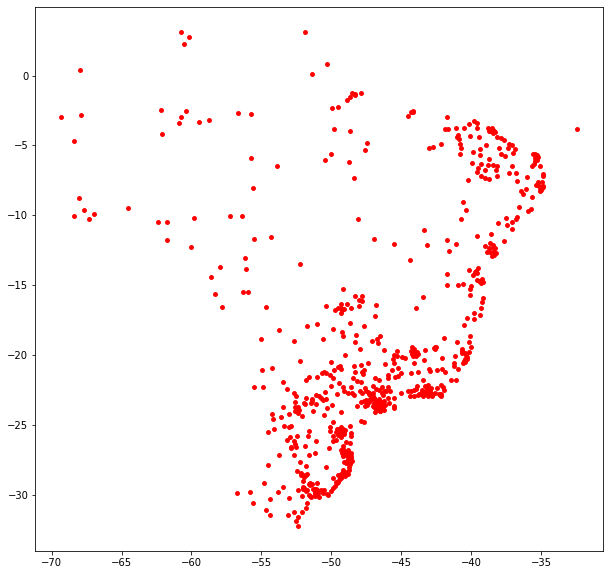

In [6]:
diretorio_covid = 'C:/Users/joaovitor/Desktop/Scripts/Python/shp_files/covid_brasil'
exemplo = gpd.read_file(os.path.join(diretorio_covid, lista_shp[40]))  
exemplo.plot(figsize=(15,10), color='red', markersize=15)

## Importando o mapa do Brasil

In [8]:
diretorio_brasil = 'C:/Users/joaovitor/Desktop/Scripts/Python/shp_files/estados_brasil/BRA_adm1.shp'  
brasil = gpd.read_file(diretorio_brasil)

## Exibindo o mapa importado

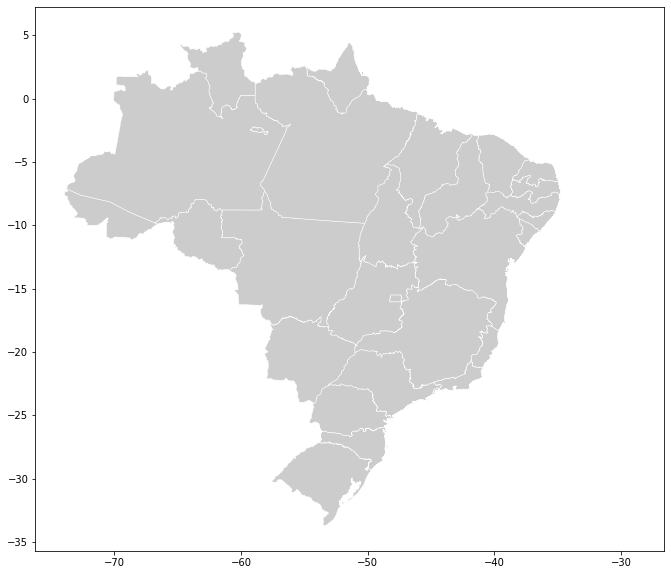

In [9]:
brasil.plot(figsize=(15,10), edgecolor='white', linewidth=0.5, color= '#CCCCCC')

## Igualando o crs de ambos os arquivos

In [ ]:
covid.crs = brasil.crs

## Ilustrando a sobreposição de mapas

(-76.2468461036682, -26.58980665206909, -35.69767973423004, 7.215475773811342)

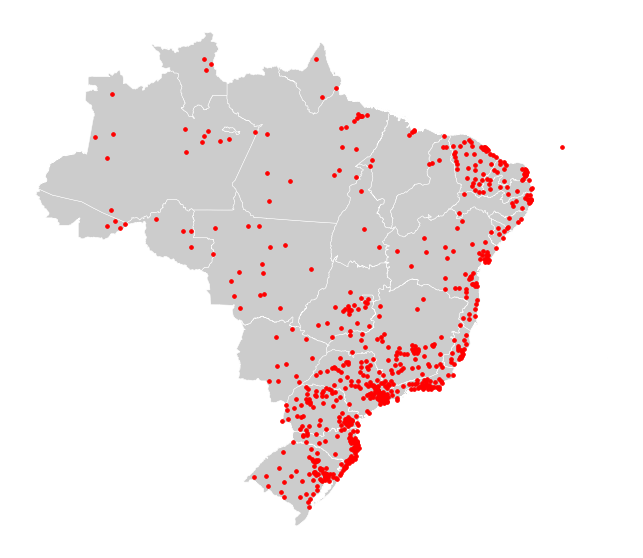

In [18]:
covid = gpd.read_file(os.path.join(diretorio, lista_shp[40]))
base = brasil.plot(color='#CCCCCC', edgecolor='white', linewidth=0.5, figsize=(15,10))
    
ax = covid.plot(ax=base, color='red', markersize=13)
ax.axis('off')

# Gerando vários mapas de uma só vez
## Para não exibir o mapa no output, usamos o comando plt.close()

In [22]:
for key, values in enumerate(lista_shp):
    covid = gpd.read_file(os.path.join(diretorio, values))
    covid.crs = brasil.crs
    base = brasil.plot(color='#CCCCCC', edgecolor='white', linewidth=0.5, figsize=(15,10))
    
    ax = covid.plot(ax=base, color='red', markersize=13)
    ax.axis('off')
    ax.set_title(f'Disseminação COVID-19\n dia {values[9:-4]}-{values[6:8]}', \
              fontdict={'fontsize': '30',
                        'fontweight' : '40'})

    ax.annotate('Para acessar os dados: www.ufrgs.br/sig/\nCódigo disponível em: github.com/joaotinti75',
           xy=(0.1, .08), xycoords='figure fraction',
           horizontalalignment='left', verticalalignment='top',
           fontsize=20, color='#555555')
    
    base.set_axis_off()
    plt.savefig(f'C:/Users/joaovitor/Desktop/imagens_mapa/{key+1}.png')

    plt.close()

## Gerando o GIF

In [32]:
import imageio

images = []
diretorio_imagens = 'C:/Users/joaovitor/Desktop/imagens_mapa'
lista = [f'{c}.png' for c in range(1, len(os.listdir(diretorio_imagens))+1)]
print(lista)
for i in lista:
    images.append(imageio.imread(os.path.join(diretorio_imagens, i)))
                  
imageio.mimsave('C:/Users/joaovitor/Desktop/mapa.gif', images, duration=0.1)
    

['1.png', '2.png', '3.png', '4.png', '5.png', '6.png', '7.png', '8.png', '9.png', '10.png', '11.png', '12.png', '13.png', '14.png', '15.png', '16.png', '17.png', '18.png', '19.png', '20.png', '21.png', '22.png', '23.png', '24.png', '25.png', '26.png', '27.png', '28.png', '29.png', '30.png', '31.png', '32.png', '33.png', '34.png', '35.png', '36.png', '37.png', '38.png', '39.png', '40.png', '41.png', '42.png', '43.png', '44.png', '45.png', '46.png', '47.png', '48.png', '49.png', '50.png', '51.png', '52.png', '53.png', '54.png', '55.png', '56.png', '57.png', '58.png', '59.png']


## A pasta onde as imagens serão salvas pode ser criada manualmente ou via código, basta dar o comando abaixo.

In [23]:
#os.mkdir('C:/Users/joaovitor/Desktop/imagens_mapa')